# **Fetal Health Dataset Notebook**


I tried to demonstrate multiple methods in a single notebook:<p>
- XGBoost multiclass mode
- XGBoost built-in feature importance
- XGBoost feature importance with Shap
- Feature Selection with BorutaShap
- Multiple model running and selection
- Model Stacking with sklearn
- Data profiling and Visualization
- Scaling data
- Finding best parameter with GridSearchCV
   
    
    

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from collections import Counter
from yellowbrick.classifier import ROCAUC
from yellowbrick.features import Rank1D, Rank2D
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score, learning_curve, cross_validate, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=f0b5c3f6e4d4a6167988c718fa47f5046e12d0758707403cb2dc72e7b11cc94d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
data=pd.read_csv('/content/fetal_health.csv')
data

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

# **Target Variable**

Target variable distribution looks imbalanced.
Some options are over/under sampling data or weighting classes.

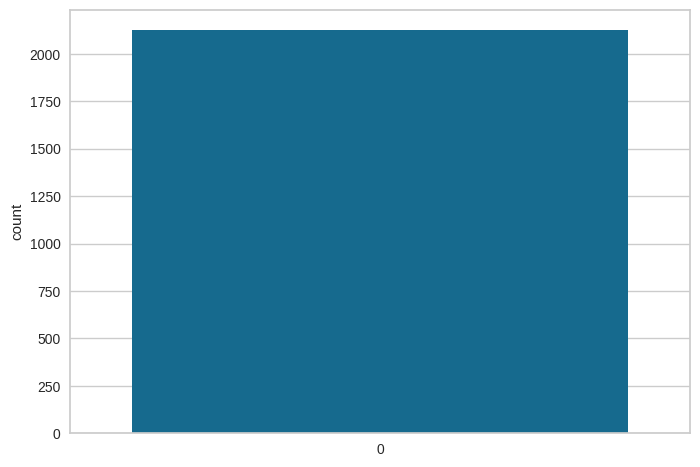

In [ ]:
sns.countplot(data.fetal_health)
plt.show()

# **Features in Dataset**

In [ ]:
cols=data.columns
cols

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

# **Missing Values**

Looks like we don't have any missing values.

In [ ]:
data.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

# **Data Profiling**

In [ ]:
from pandas_profiling import ProfileReport
import pandas_profiling as pdp

#https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/pages/advanced_usage.html

profile = ProfileReport(data, title='Pandas Profiling Report', minimal=True,progress_bar=False,
    missing_diagrams={
          'heatmap': False,
          'dendrogram': False,
      } )
profile

In [ ]:
features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

X = pd.DataFrame(data=data, columns=features)
y = pd.DataFrame(data=data, columns=['fetal_health'])
y = y.astype(int)
# to make labels start from 0 to n_classes, otherwise I couldn't manage to run xgb with labels starting from 1 to n_classes 😟😟😟
y = y-1
X.head()


baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                               43.0       ...   
1                                                0.0       ...   
2                                                0.0       ...   
3                                                0.0       ...   
4                                                0.0       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0             64.0           62.0          126.0                        2.0   
1            130.0           68.0          198.0                        6.0   
2            130.0           68.0          198.0                        5.0   
3            117.0           53.0          170.0                       11.0   
4            117.0           53.0          170.0                        9.0   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                         0.0           120.0           137.0   
1                         1.0           141.0           136.0   
2                         1.0           141.0           135.0   
3                         0.0           137.0           134.0   
4                         0.0           137.0           136.0   

   histogram_median  histogram_variance  histogram_tendency  
0             121.0                73.0                 1.0  
1             140.0                12.0                 0.0  
2             138.0                13.0                 0.0  
3             137.0                13.0                 1.0  
4             138.0                11.0                 1.0  

[5 rows x 21 columns]

# **Features**

# **Basic Feature Stats**

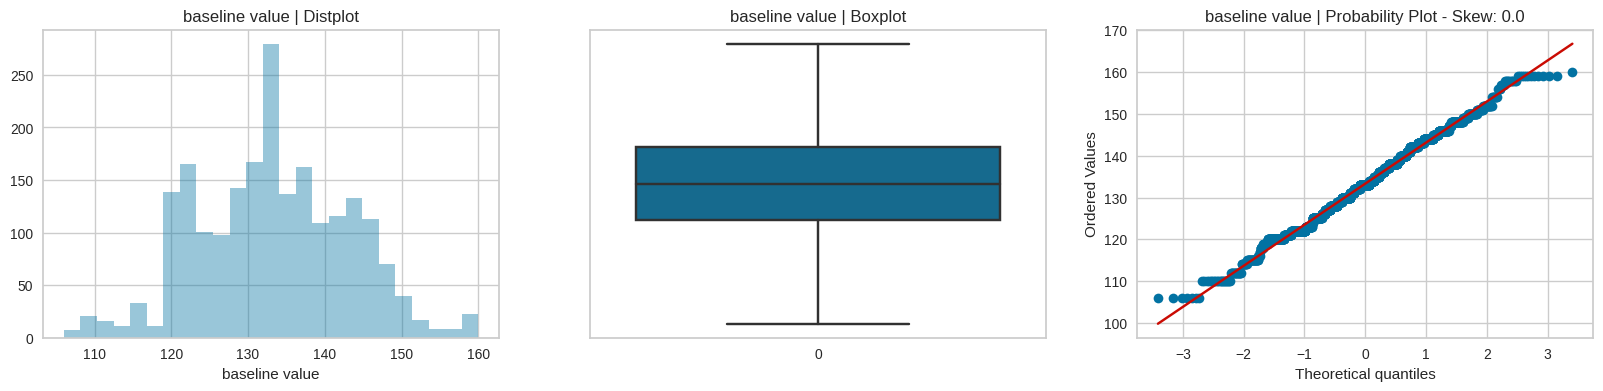

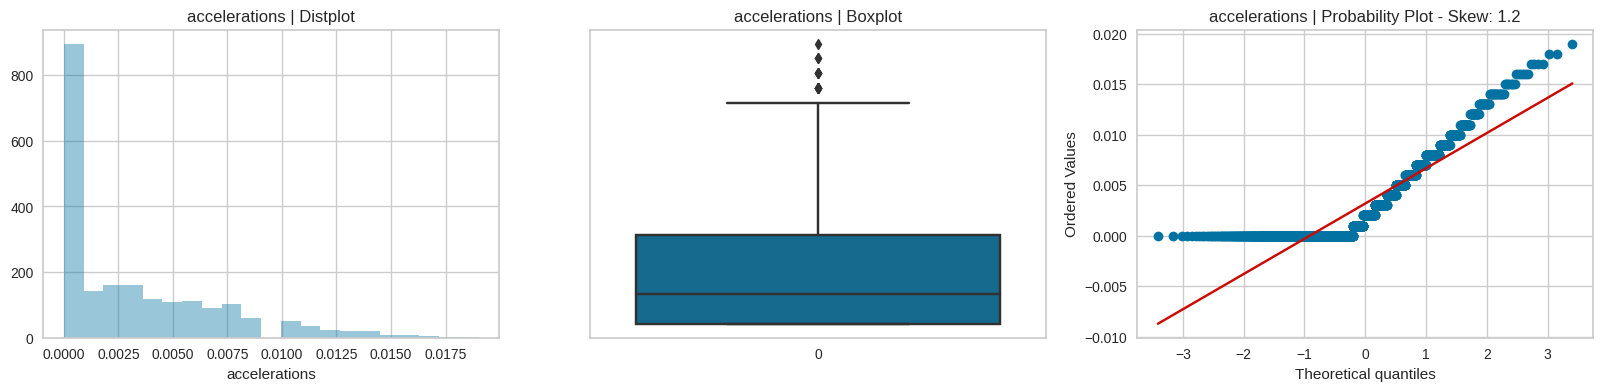

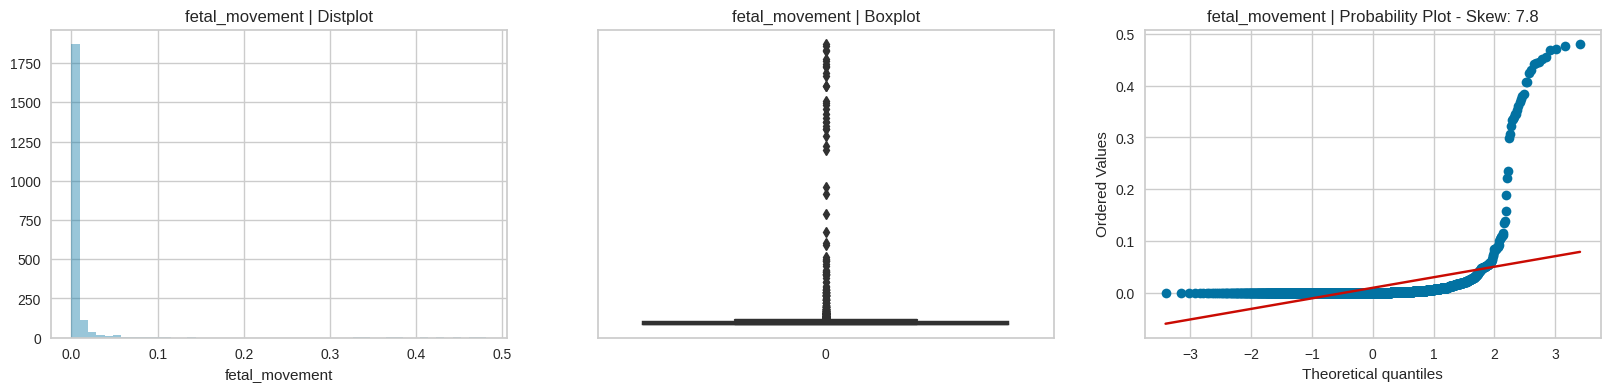

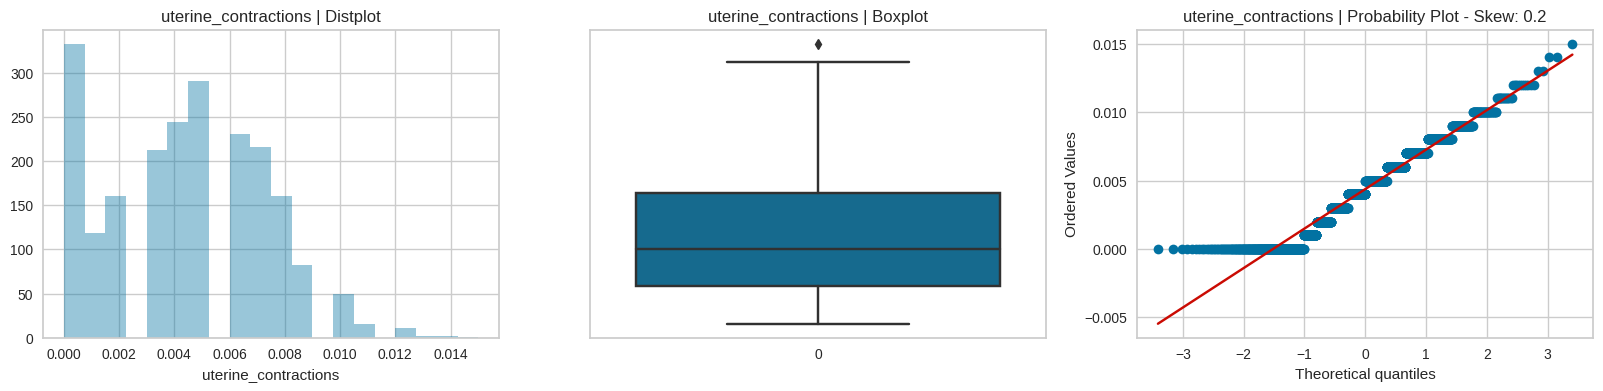

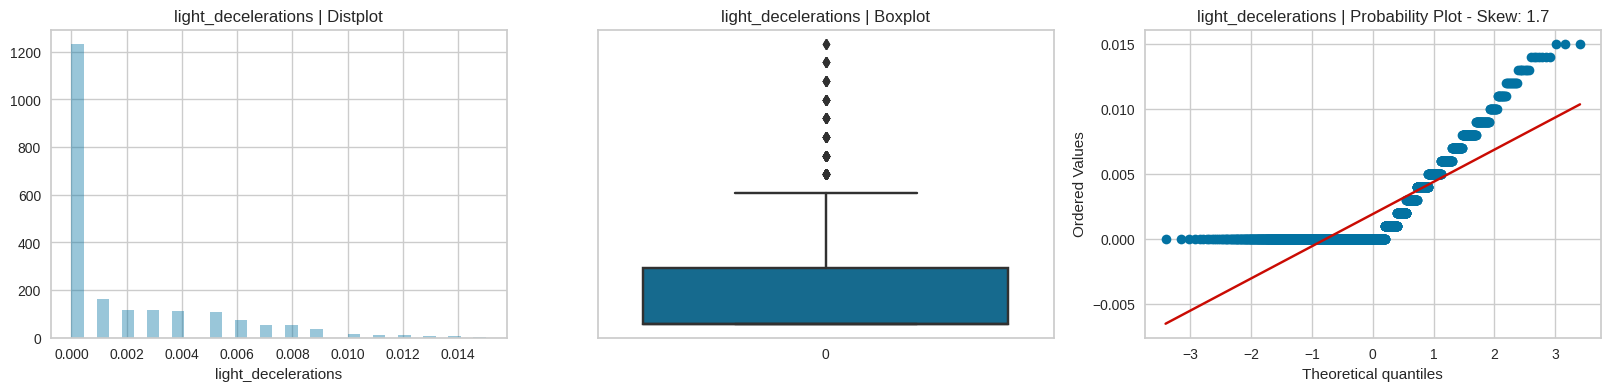

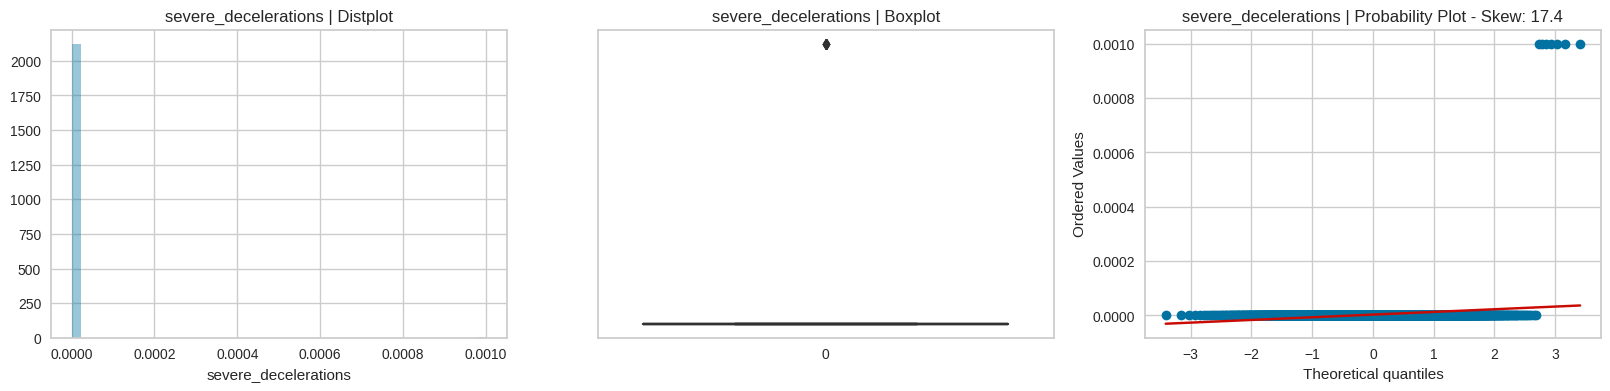

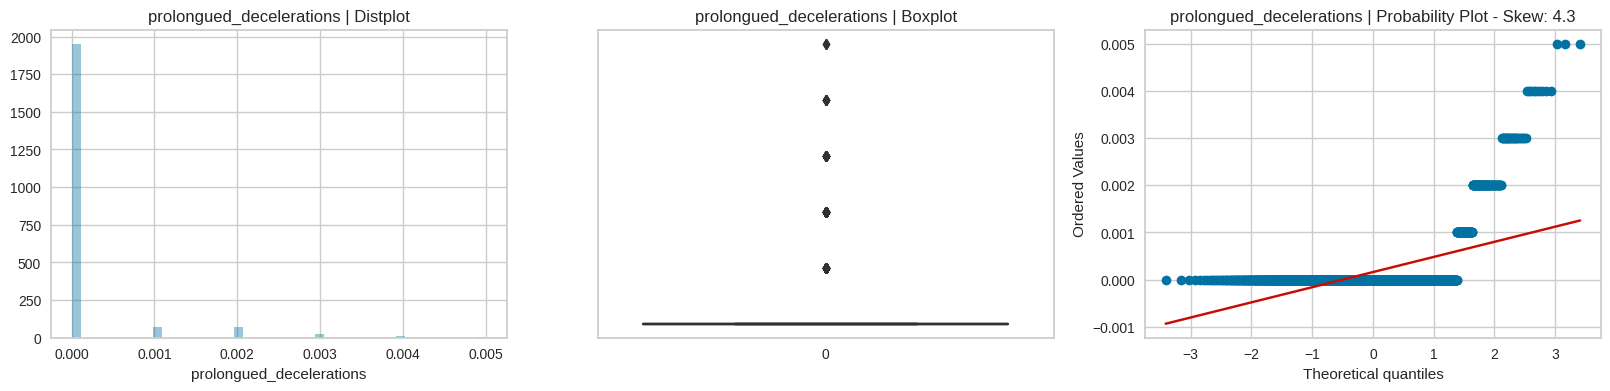

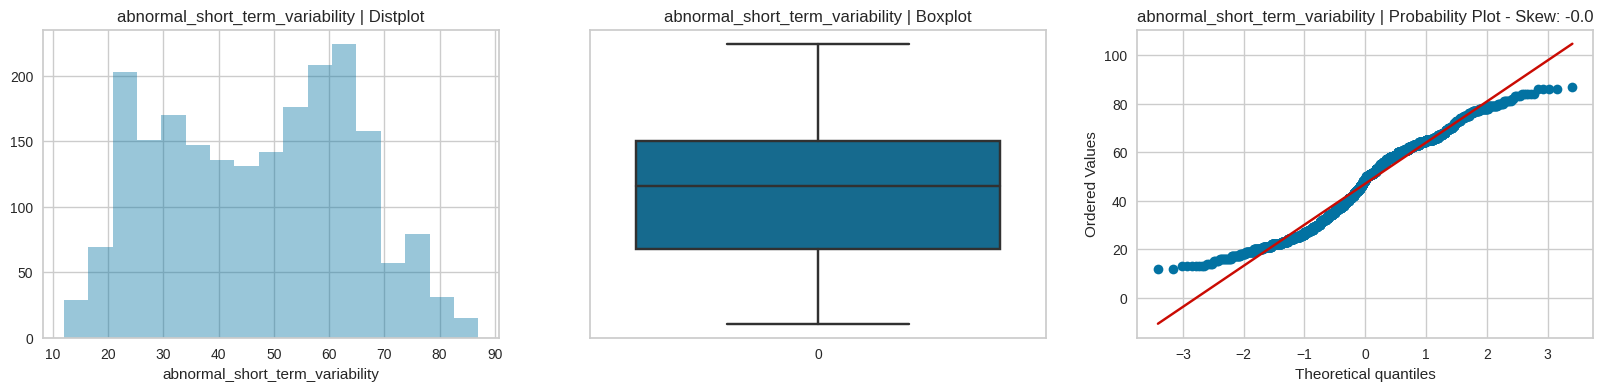

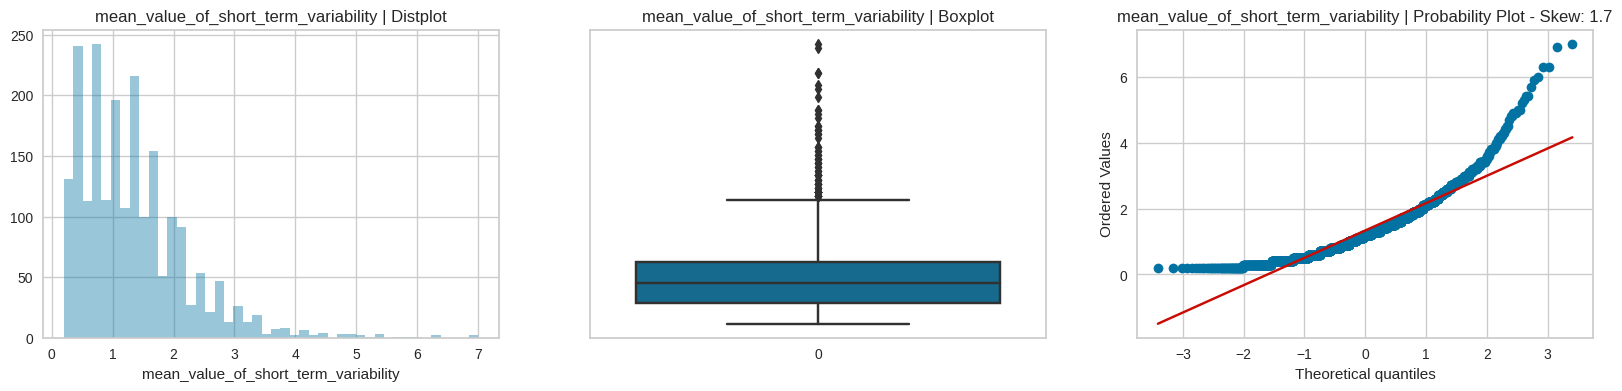

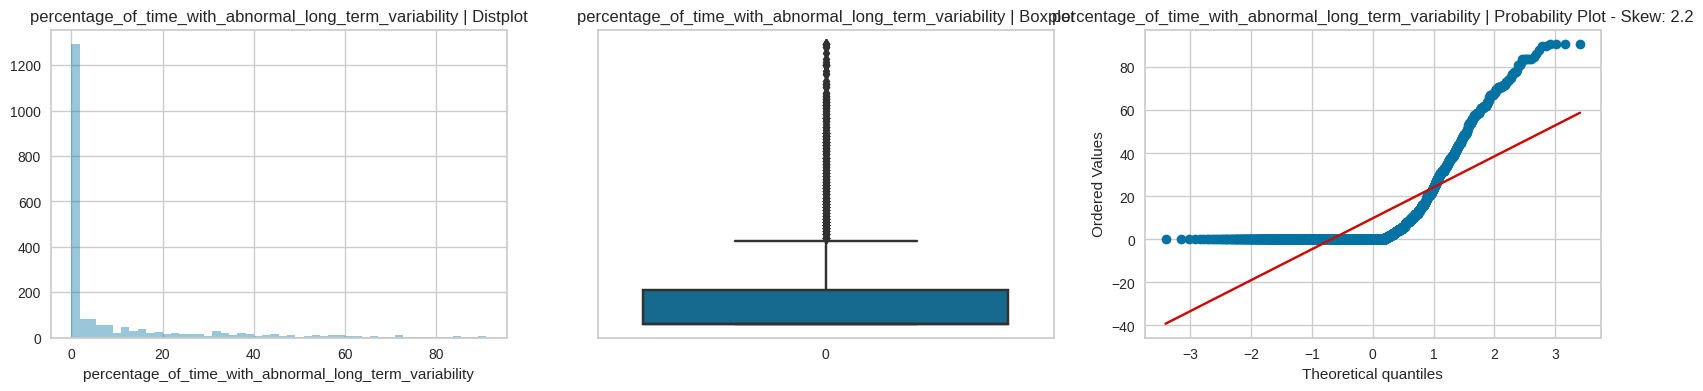

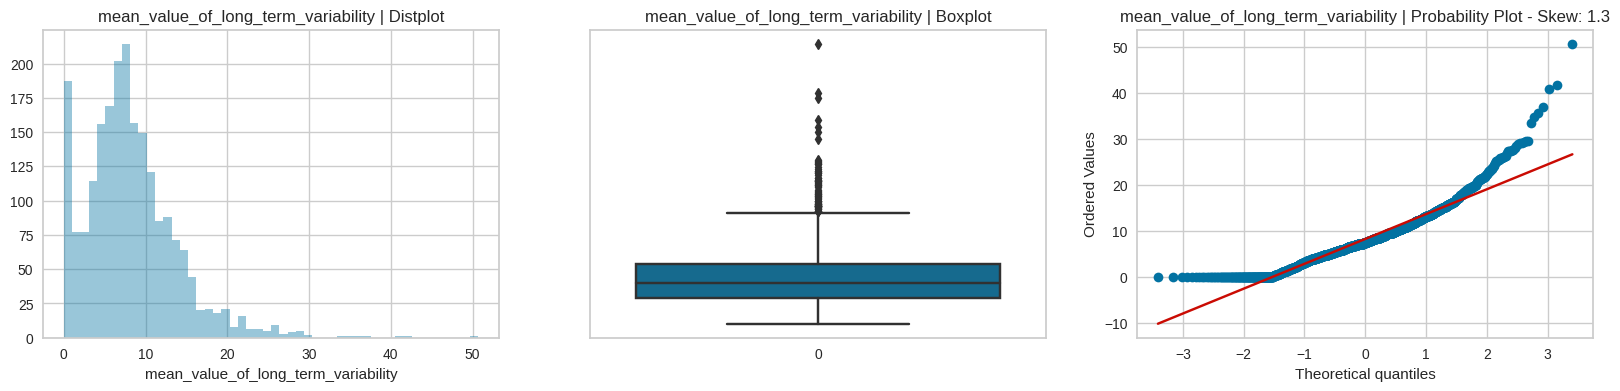

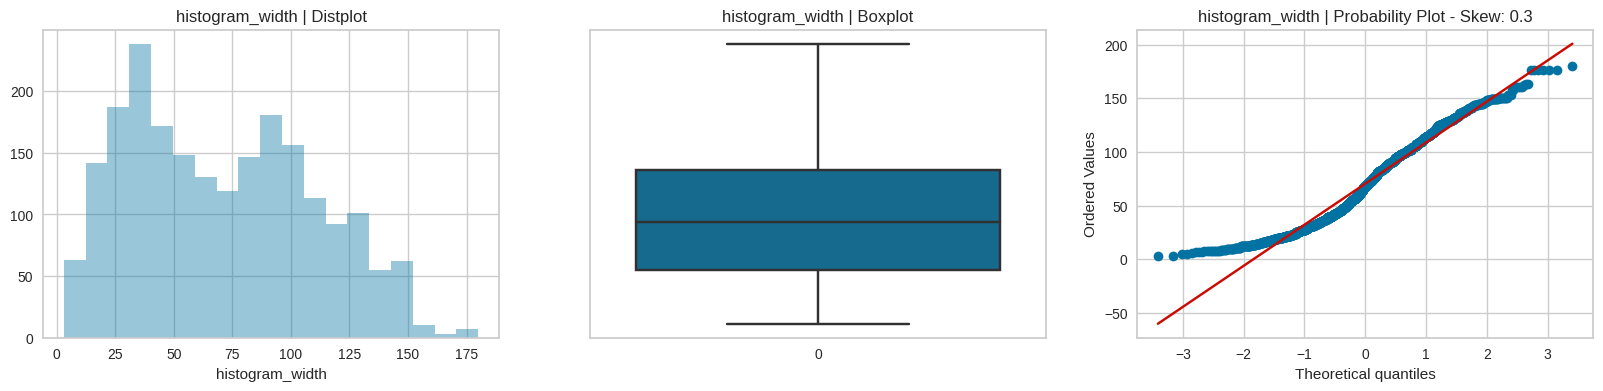

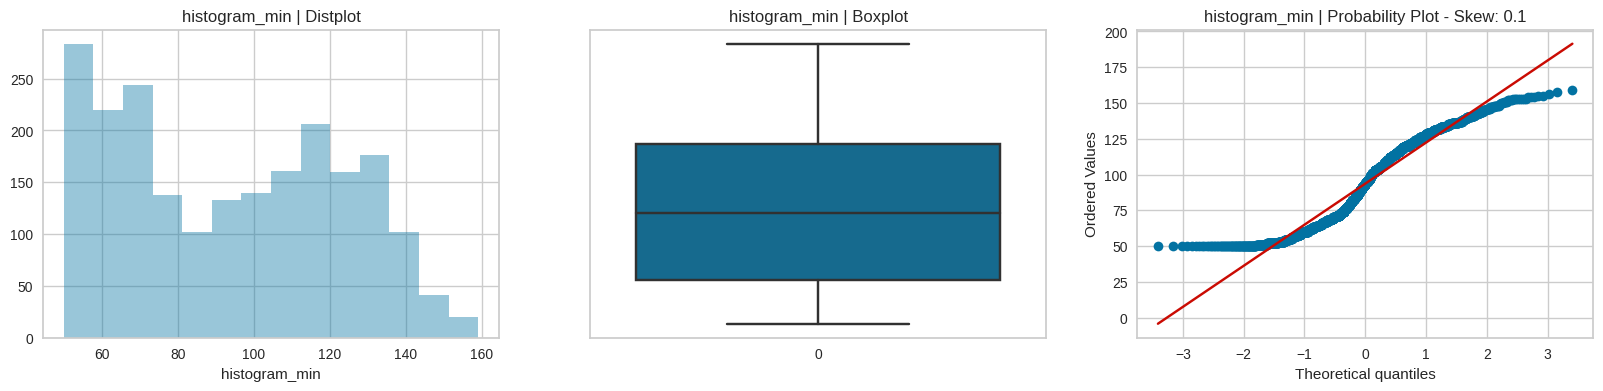

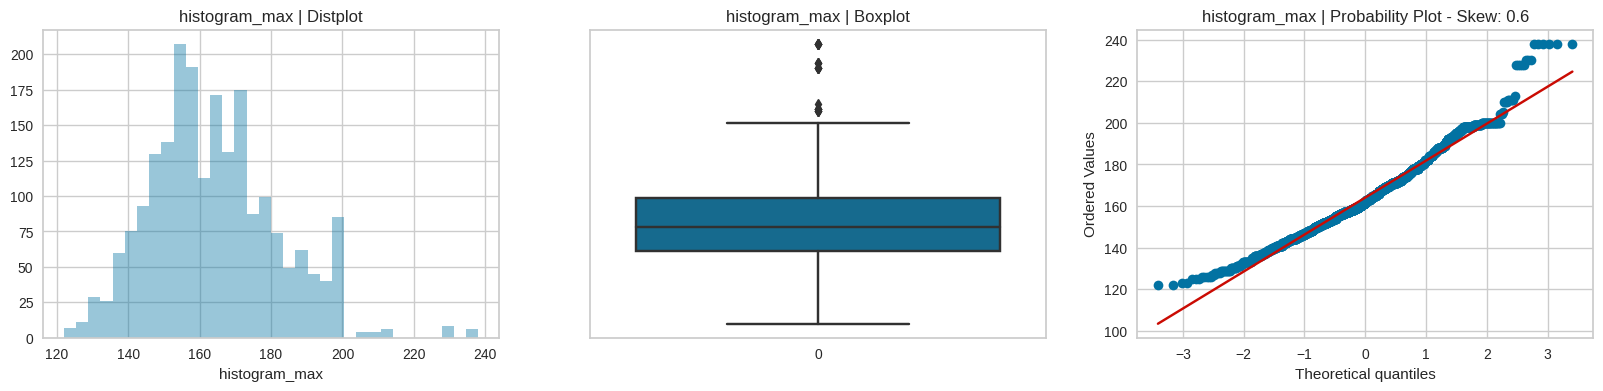

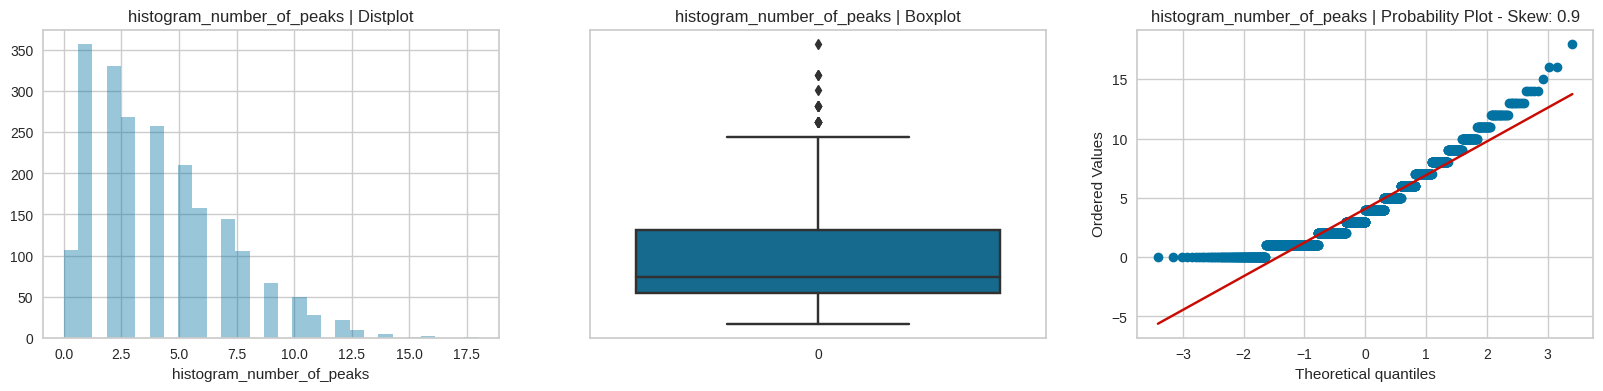

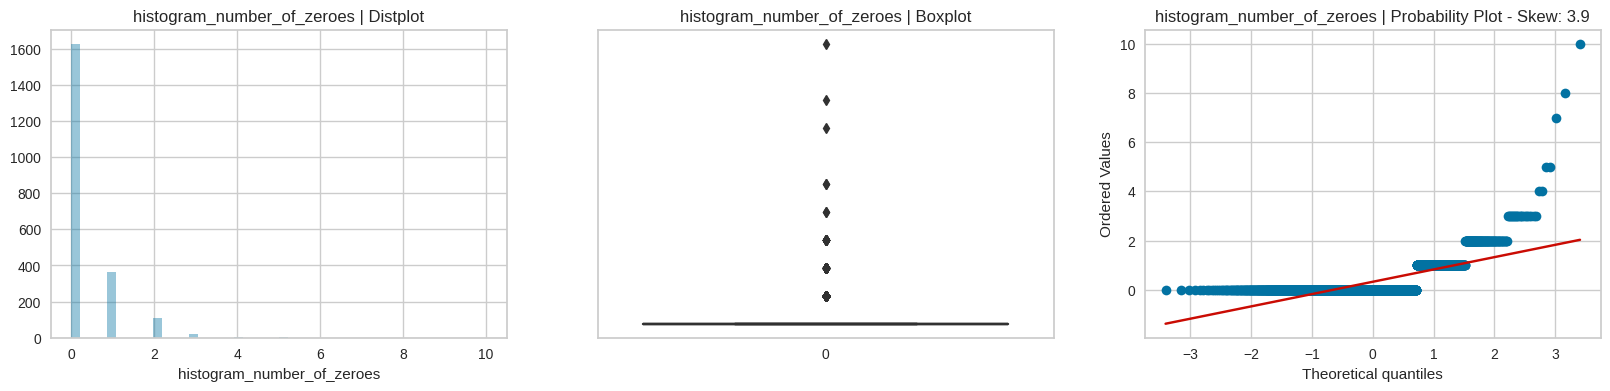

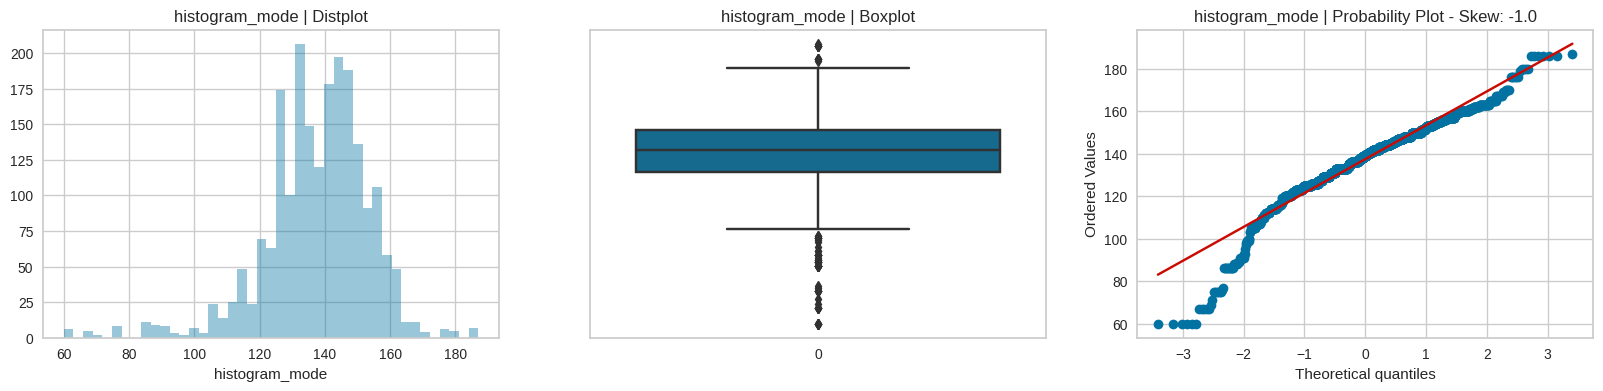

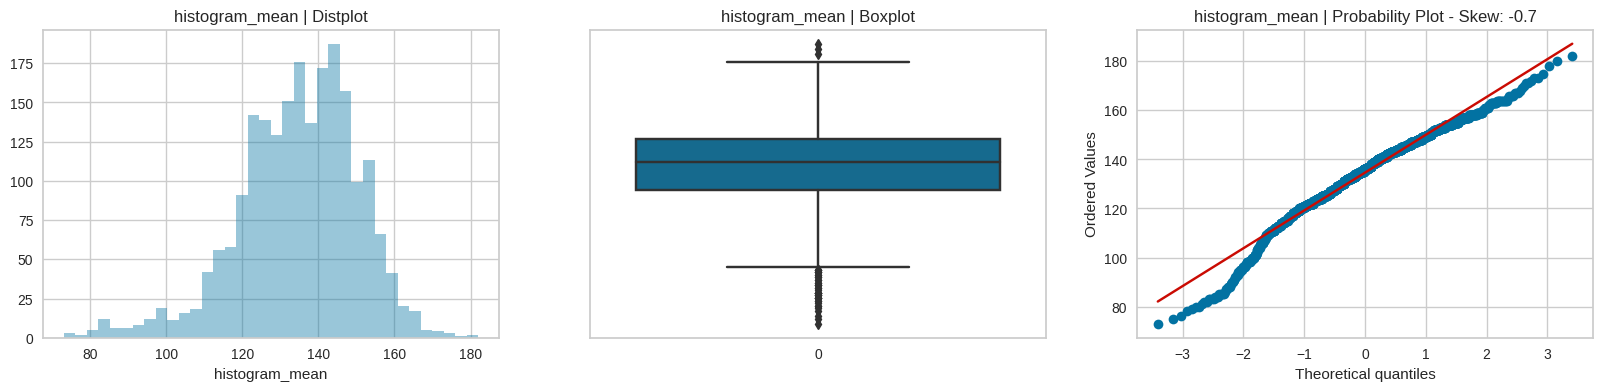

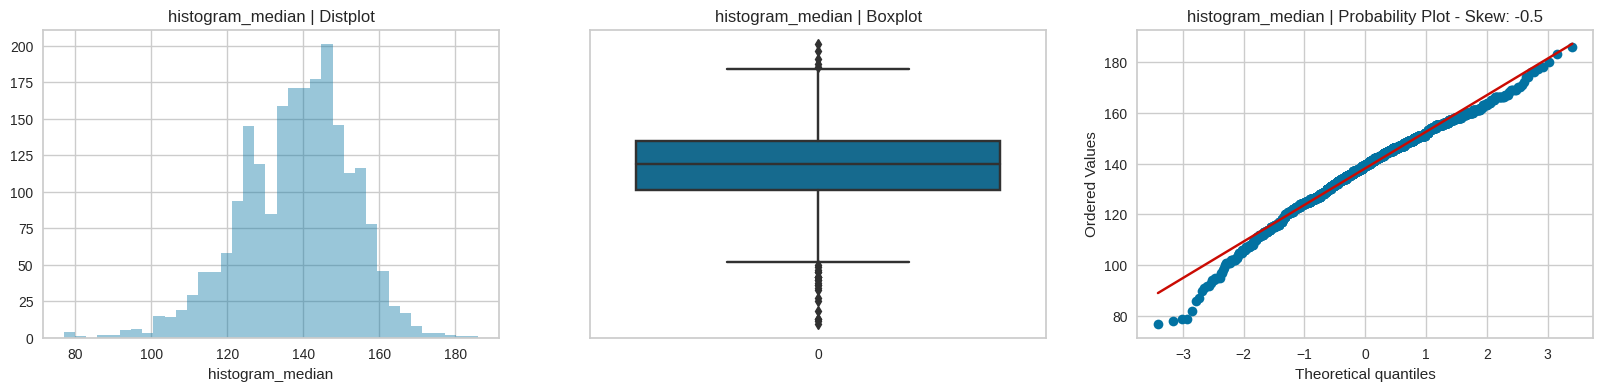

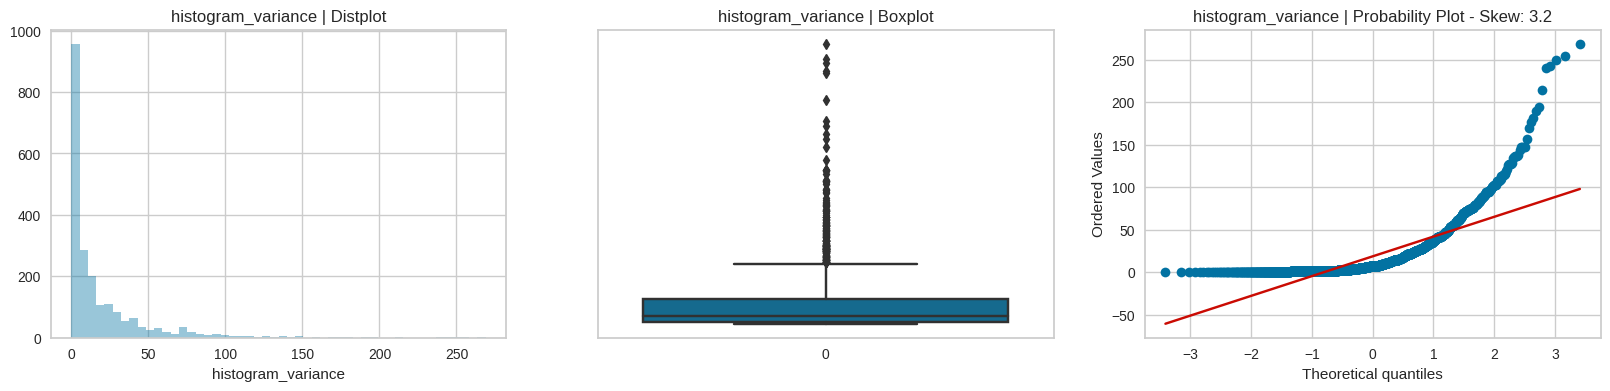

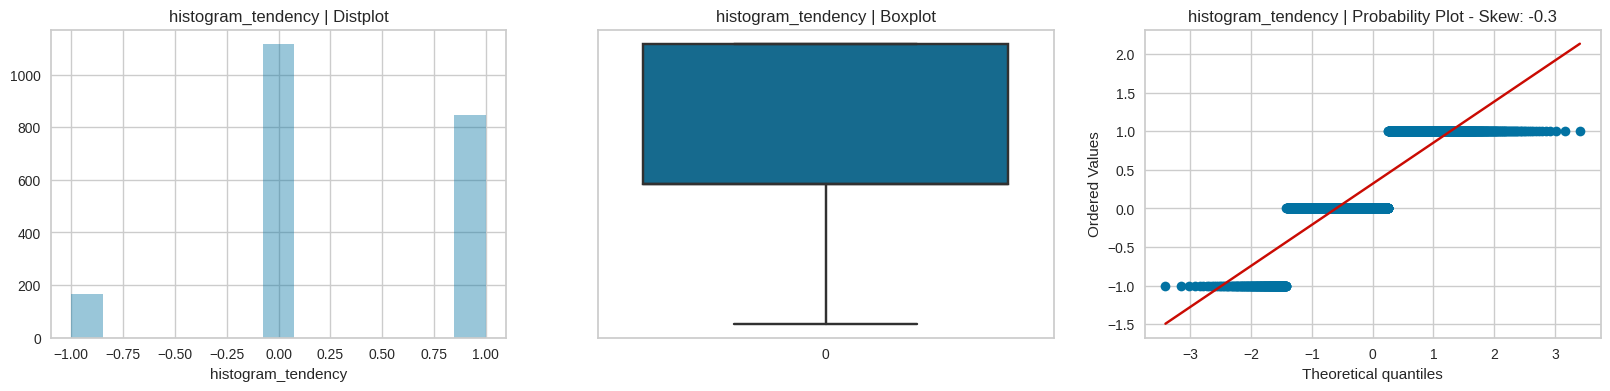

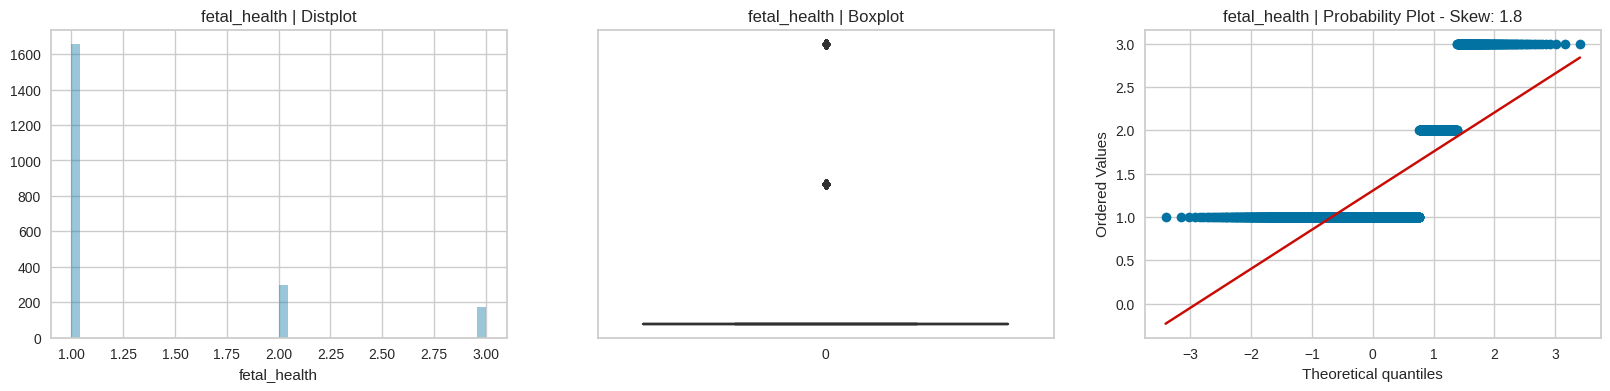

In [ ]:
from scipy.stats import probplot,skew

for i in cols:
    fig, axes = plt.subplots(1, 3, figsize=(20,4))
    sns.distplot(data[i],kde=False, ax=axes[0])
    sns.boxplot(data[i], ax=axes[1])
    probplot(data[i], plot=axes[2])
    skew_val=round(data[i].skew(), 1)
    axes[1].set_yticklabels([])
    axes[1].set_yticks([])
    axes[0].set_title(i + " | Distplot")
    axes[1].set_title(i + " | Boxplot")
    axes[2].set_title(i + " | Probability Plot - Skew: "+str(skew_val))
    plt.show()

# **Correlation Heatmap**

In [ ]:
def correlation_heatmap(train):
    correlations = train.corr()
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()


If we compare target variable 'fetal_health' and correlations, 3 features looks most important ones as
- prolongued_decelerations
- abnormal_short_term_variability
- percentage_of_time_with_abnormal_long_term_variability

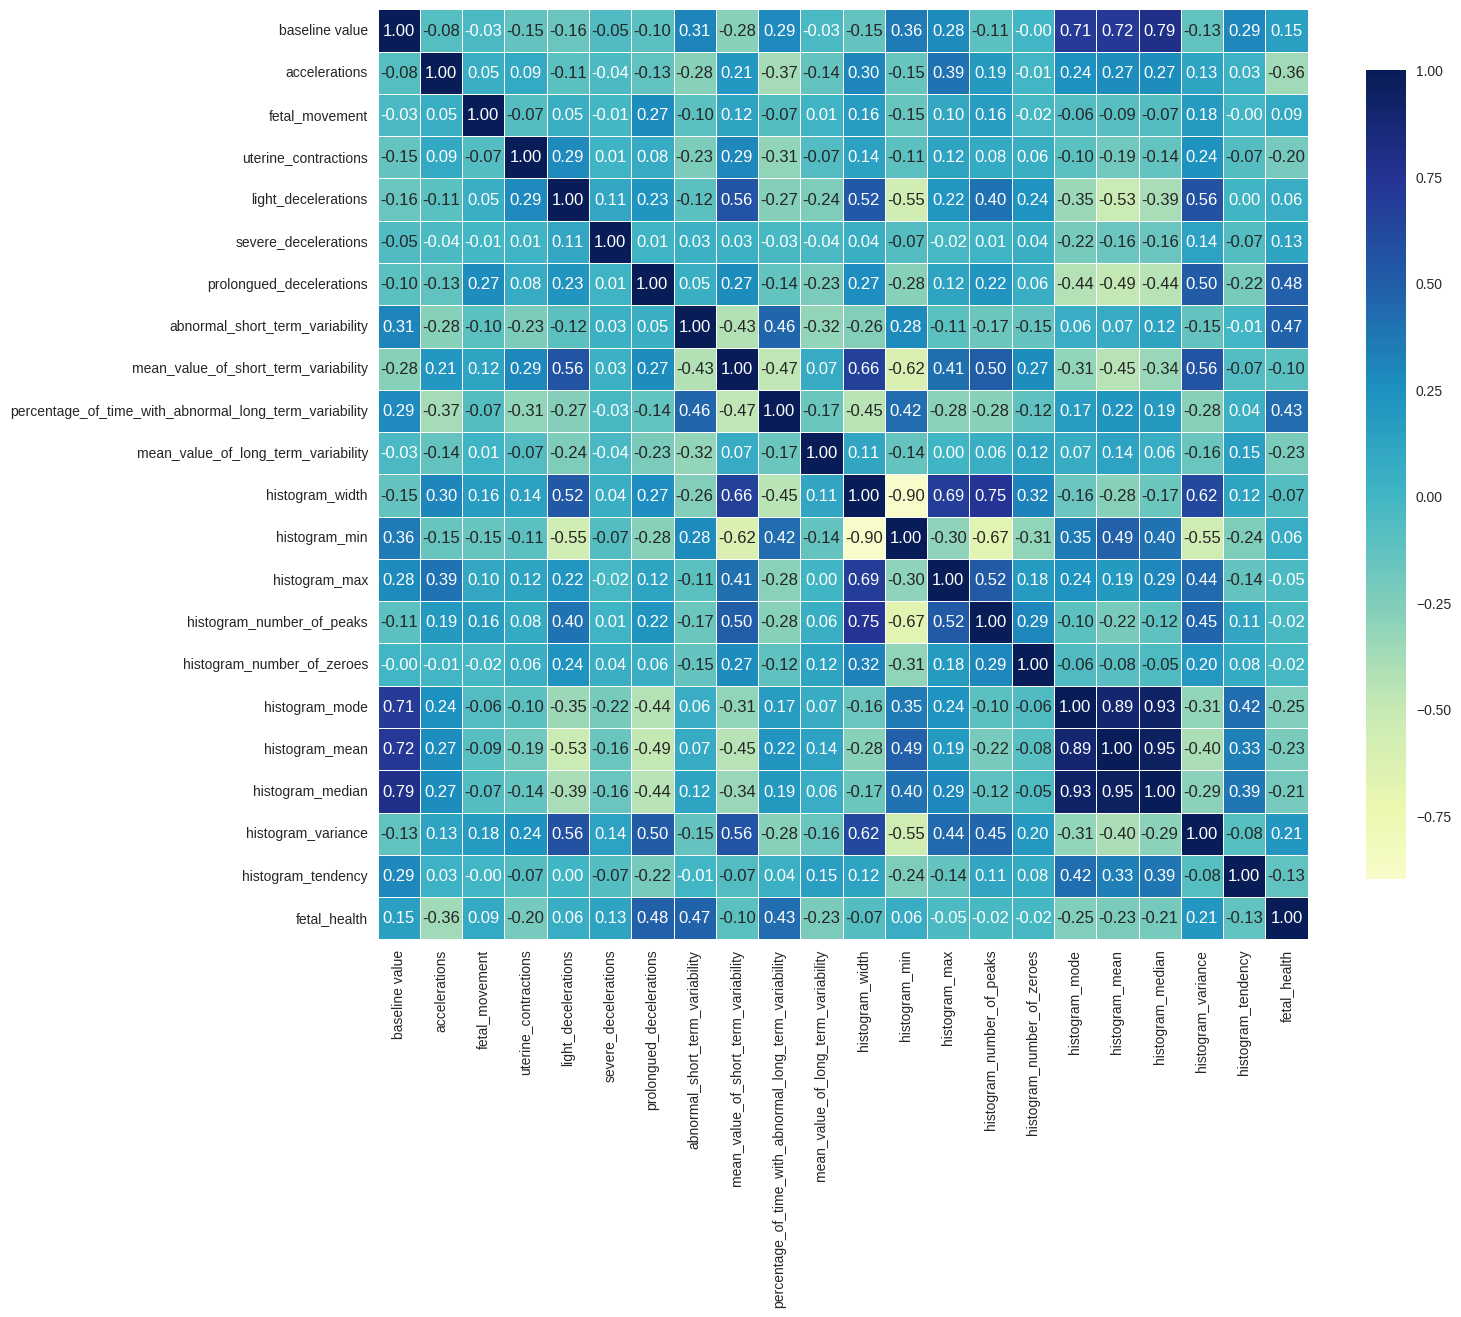

In [ ]:
correlation_heatmap(data)

# **Train Test Split**

In [ ]:
# 30% test and 70% train data as mentioned by dataset Author
# in the task https://www.kaggle.com/andrewmvd/fetal-health-classification/tasks?taskId=2410
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((1488, 21), (1488, 1), (638, 21), (638, 1))

# **Model**

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [ ]:
params = {
    'max_depth': 6,
    'objective': 'multi:softmax',
    'num_class': 3,
    # Set number of GPUs if available
    'n_gpus': 0
}

# **Fit Model**

In [ ]:
bst = xgb.train(params, dtrain)

[12:07:03] WARNING: ../src/learner.cc:767: 
Parameters: { "n_gpus" } are not used.



# **Predict**

In [ ]:
pred = bst.predict(dtest)
Counter(pred)

Counter({2.0: 54, 0.0: 512, 1.0: 72})

# **Report**

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       497
           1       0.86      0.70      0.78        88
           2       0.91      0.92      0.92        53

    accuracy                           0.93       638
   macro avg       0.91      0.87      0.88       638
weighted avg       0.93      0.93      0.93       638



# **Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, pred)
cm

array([[485,   9,   3],
       [ 24,  62,   2],
       [  3,   1,  49]])

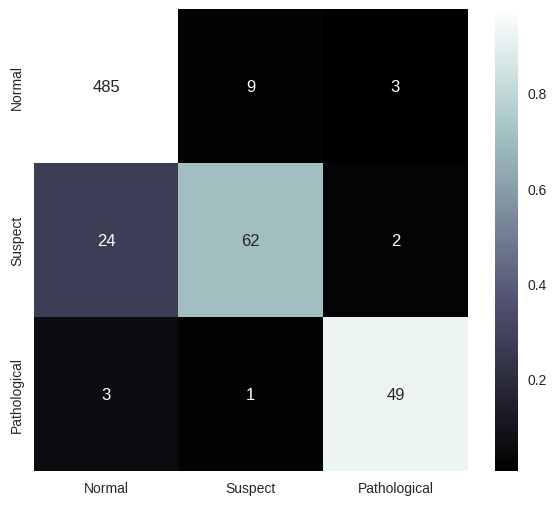

In [ ]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

plot_confusion_matrix(cm, ['Normal', 'Suspect', 'Pathological'])

# **F1 Score**

In [ ]:
f1_score(y_test, pred, average=None)

array([0.96134787, 0.775     , 0.91588785])

# **Feature Importance with XGBoost Built-in**

OK we use xgboost builtin plot_importance here to plot out most important features for model. I used 'weight' as importance type here. which is
Other **importance_types**

- ‘weight’ - the number of times a feature appears in tree(s).
- ‘gain’ - the average gain across all splits the feature is used in.
- ‘cover’ - the average coverage across all splits the feature is used in.
- ‘total_gain’ - the total gain across all splits the feature is used in.
- ‘total_cover’ - the total coverage across all splits the feature is used in. <p>
    
## **NOTE:**
    
It's also possible to get features out of model without using plot_importance() function with get_score().<br>
bst.get_score(importance_type='weight')

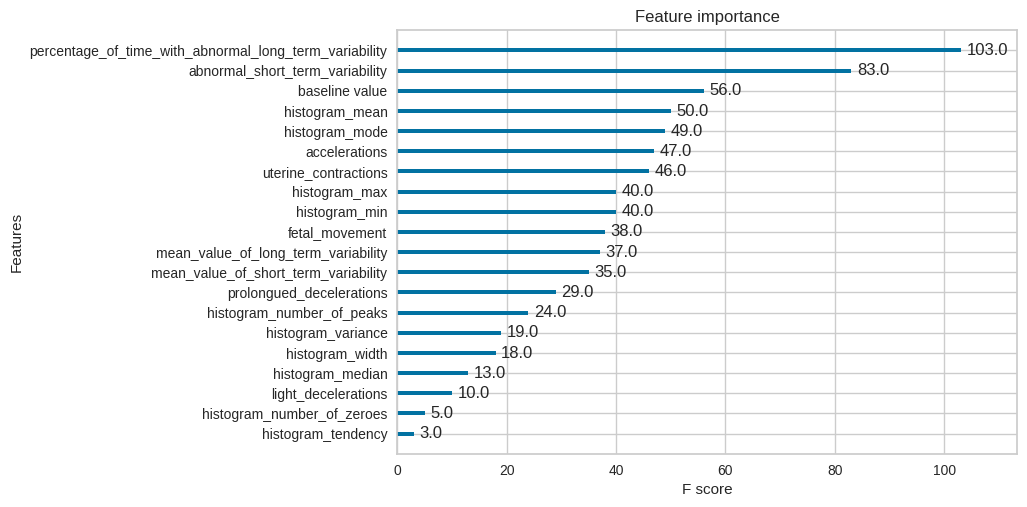

In [ ]:
plot_importance(bst,importance_type='weight')
pyplot.show()

# **Feature importance with SHAP**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 4.7 MB/s eta 0:00:00


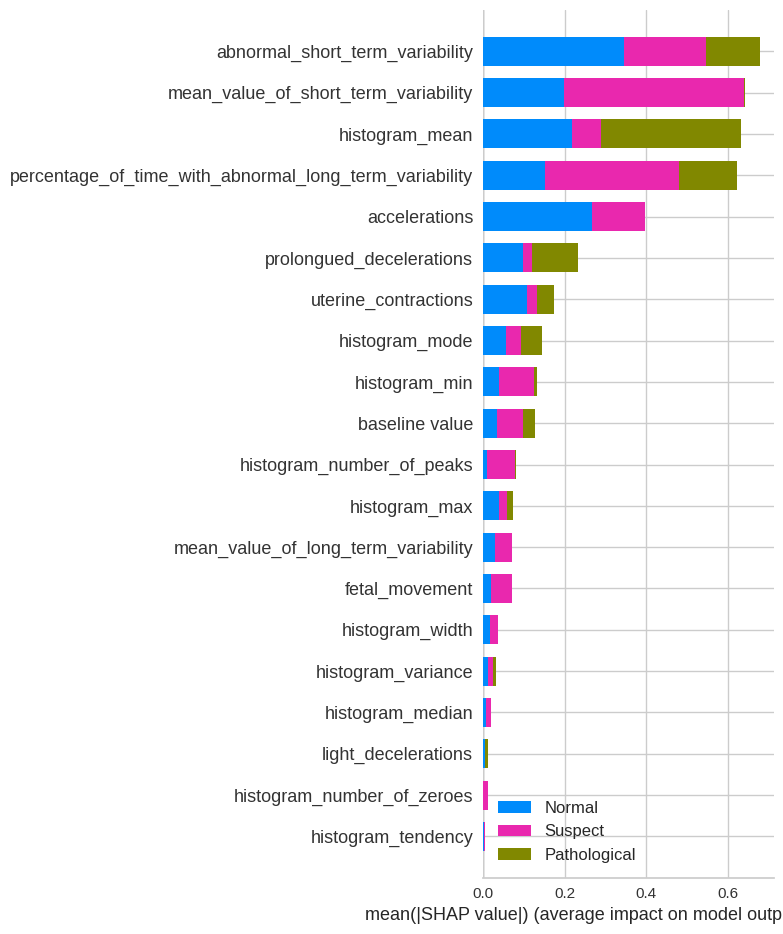

In [ ]:
import shap
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X_test)

classes=['Normal', 'Suspect', 'Pathological']

shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=classes)

# **BorutaShap**

BorutaShap is a wrapper feature selection method which combines both the Boruta feature selection algorithm with shapley values. Despite BorutaShap's runtime improvments the SHAP TreeExplainer scales linearly with the number of observations making it's use cumbersome for large datasets. To combat this, BorutaShap includes a sampling procedure which uses the smallest possible subsample of the data availble at each iteration of the algorithm.


if we don't define model parameter, default model is RandomForest for BorutaShap.
Since we used xgboost mainly and above done some tests with sample weight and no weight models, I'll try with feature selection with Boruta to see results.
We set Classification True since this is a classification problem.


Reference: [https://github.com/Ekeany/Boruta-Shap](https://github.com/Ekeany/Boruta-Shap)

In [ ]:
pip install BorutaShap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.1 MB/s eta 0:00:00


In [ ]:
from BorutaShap import BorutaShap


model = XGBClassifier(random_state=55)
Feature_Selector = BorutaShap(model=model, importance_measure='shap', classification=True)


Feature_Selector.fit(X=X_train, y=y_train.values, n_trials=100, random_state=0)

  0%|          | 0/100 [00:00<?, ?it/s]

11 attributes confirmed important: ['mean_value_of_short_term_variability', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability', 'abnormal_short_term_variability', 'histogram_variance', 'accelerations', 'uterine_contractions', 'histogram_min', 'mean_value_of_long_term_variability', 'prolongued_decelerations', 'histogram_mode']
9 attributes confirmed unimportant: ['fetal_movement', 'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'histogram_max', 'histogram_tendency', 'severe_decelerations', 'histogram_width', 'baseline value', 'light_decelerations']
1 tentative attributes remains: ['histogram_median']


The which_features parameter has four different modes, ‘all’, ‘accepted’, ‘rejected’ and ‘tentative’.

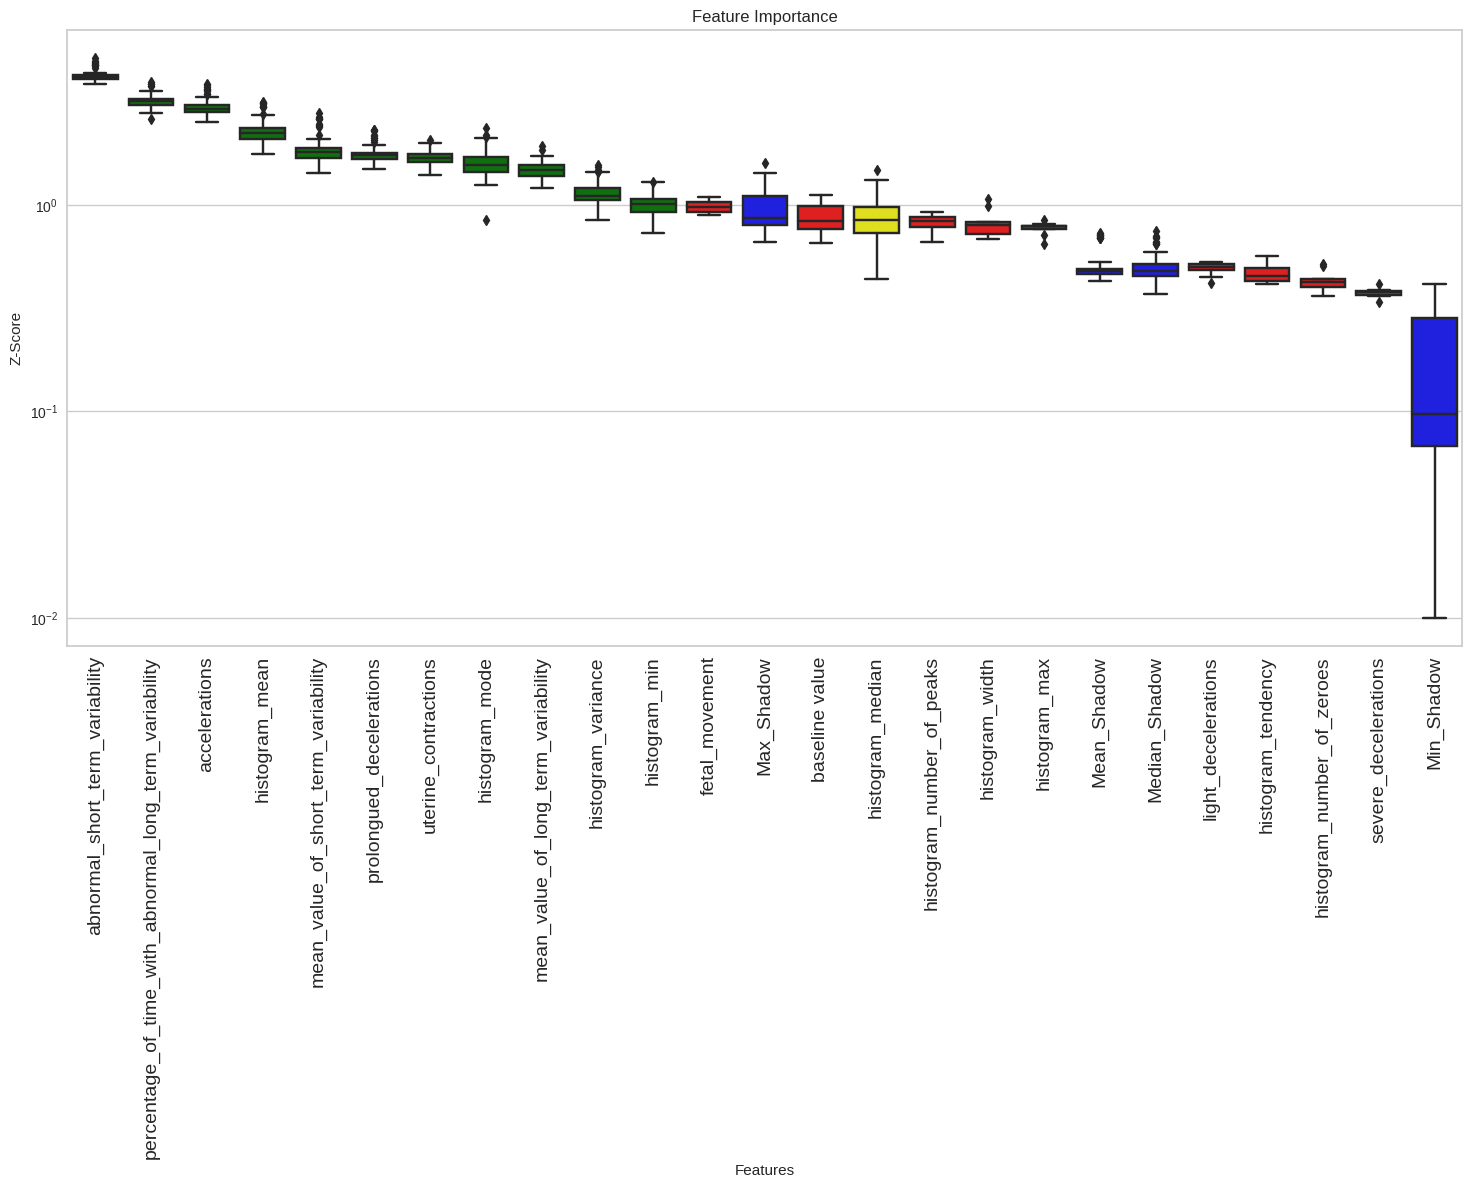

In [ ]:
Feature_Selector.plot(which_features='all',X_size=14, figsize=(18,8),y_scale='log')

In [ ]:
# Returns a subset of the original data with the selected features
subset = Feature_Selector.Subset()
subset.head()

mean_value_of_short_term_variability  histogram_mean  \
480                                    0.8           141.0   
123                                    1.3           122.0   
1099                                   1.8           127.0   
1804                                   0.3           144.0   
381                                    1.1           147.0   

      percentage_of_time_with_abnormal_long_term_variability  \
480                                                32.0        
123                                                 0.0        
1099                                                0.0        
1804                                                5.0        
381                                                 0.0        

      abnormal_short_term_variability  histogram_variance  accelerations  \
480                              60.0                 3.0          0.000   
123                              33.0                39.0          0.006   
1099                             22.0                 4.0          0.003   
1804                             68.0                 1.0          0.000   
381                              41.0                60.0          0.009   

      uterine_contractions  histogram_min  \
480                  0.001           79.0   
123                  0.006           61.0   
1099                 0.004          103.0   
1804                 0.002          135.0   
381                  0.003           65.0   

      mean_value_of_long_term_variability  prolongued_decelerations  \
480                                  11.2                       0.0   
123                                   4.7                       0.0   
1099                                 14.7                       0.0   
1804                                  9.4                       0.0   
381                                   2.9                       0.0   

      histogram_mode  
480            141.0  
123            135.0  
1099           126.0  
1804           144.0  
381            133.0

# **XGBoost with Boruta Selected Features**

In [ ]:
xgb = XGBClassifier(random_state=55)
xgb.fit(X_train[subset.columns],y_train)

pred = xgb.predict(X_test[subset.columns])
cm = confusion_matrix(y_test, pred)
cm

array([[485,   7,   5],
       [ 21,  64,   3],
       [  3,   1,  49]])

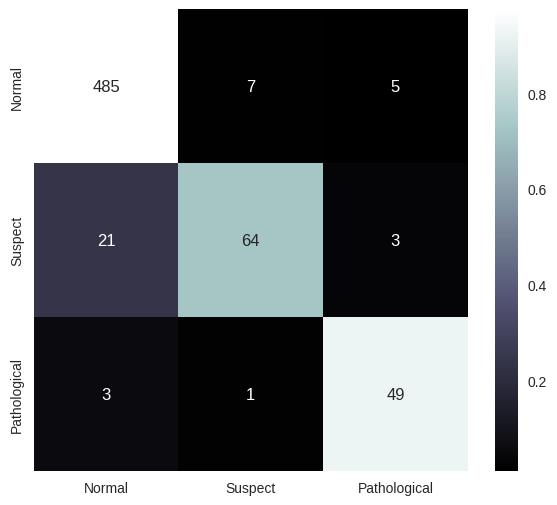

In [ ]:
plot_confusion_matrix(cm, ['Normal', 'Suspect', 'Pathological'])

# **Classification Report**

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       497
           1       0.89      0.73      0.80        88
           2       0.86      0.92      0.89        53

    accuracy                           0.94       638
   macro avg       0.90      0.88      0.89       638
weighted avg       0.94      0.94      0.94       638



# **F1 Score**

In [ ]:
f1_score(y_test, pred, average=None)

array([0.96421471, 0.8       , 0.89090909])

# **Scaling Data**

For further testing trying to scale data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[subset.columns])
X_test_scaled = scaler.transform(X_test[subset.columns])


When we transform data to scaled format it's now in array format.<br>
But we can transorm scaled data format back into pandas datafarme easily 😃

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=subset.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=subset.columns)
X_train_scaled_df.head()

mean_value_of_short_term_variability  histogram_mean  \
0                              0.088235        0.623853   
1                              0.161765        0.449541   
2                              0.235294        0.495413   
3                              0.014706        0.651376   
4                              0.132353        0.678899   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                           0.351648        
1                                           0.000000        
2                                           0.000000        
3                                           0.054945        
4                                           0.000000        

   abnormal_short_term_variability  histogram_variance  accelerations  \
0                         0.648649            0.011811       0.000000   
1                         0.283784            0.153543       0.333333   
2                         0.135135            0.015748       0.166667   
3                         0.756757            0.003937       0.000000   
4                         0.391892            0.236220       0.500000   

   uterine_contractions  histogram_min  mean_value_of_long_term_variability  \
0              0.071429       0.268519                             0.274510   
1              0.428571       0.101852                             0.115196   
2              0.285714       0.490741                             0.360294   
3              0.142857       0.787037                             0.230392   
4              0.214286       0.138889                             0.071078   

   prolongued_decelerations  histogram_mode  
0                       0.0        0.637795  
1                       0.0        0.590551  
2                       0.0        0.519685  
3                       0.0        0.661417  
4                       0.0        0.574803

# **GridSearchCV and XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Define XGBoost hyperparameters
params = {
    'n_estimators' : [100, 150, 200, 250],
    'max_depth': [10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=55, nthread=-1)

# Define cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(
    xgb_model,
    param_grid=params,
    scoring='accuracy',
    cv=skf.split(X_train_scaled_df, y_train),
    n_jobs=-1
)

grid_search.fit(X_train_scaled_df, y_train)

best_model = grid_search.best_estimator_

# Fit the model on augmented data using SMOTE
smote = SMOTE(random_state=55)
X_train_aug, y_train_aug = smote.fit_resample(X_train_scaled_df, y_train)

best_model.fit(X_train_aug, y_train_aug)

# Predict and evaluate on the test set
best_pred = best_model.predict(X_test_scaled_df)
best_accuracy = accuracy_score(y_test, best_pred)
best_cm = confusion_matrix(y_test, best_pred)

print("Best Model Accuracy:", best_accuracy)
print("Confusion Matrix:")
print(best_cm)


Best Model Accuracy: 0.932601880877743
Confusion Matrix:
[[478  14   5]
 [ 18  67   3]
 [  2   1  50]]


In [ ]:
best_params= grid.best_params_
best_model = grid.best_estimator_
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 15,
 'n_estimators': 150,
 'subsample': 0.8}

In [ ]:
xgb = XGBClassifier(random_state=55,n_estimators=200,max_depth=10)
xgb.fit(X_train_scaled_df,y_train)
pred = xgb.predict(X_test_scaled_df)
cm = confusion_matrix(y_test, pred)
cm

array([[482,  11,   4],
       [ 21,  64,   3],
       [  3,   1,  49]])

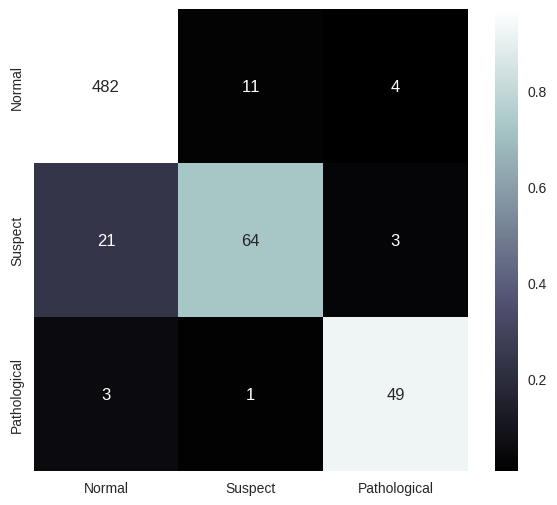

In [ ]:
plot_confusion_matrix(cm, ['Normal', 'Suspect', 'Pathological'])

# **Classification Report**

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       497
           1       0.84      0.73      0.78        88
           2       0.88      0.92      0.90        53

    accuracy                           0.93       638
   macro avg       0.89      0.87      0.88       638
weighted avg       0.93      0.93      0.93       638



F1 Score

In [ ]:
f1_score(y_test, pred, average=None)

array([0.96111665, 0.7804878 , 0.89908257])